Q1

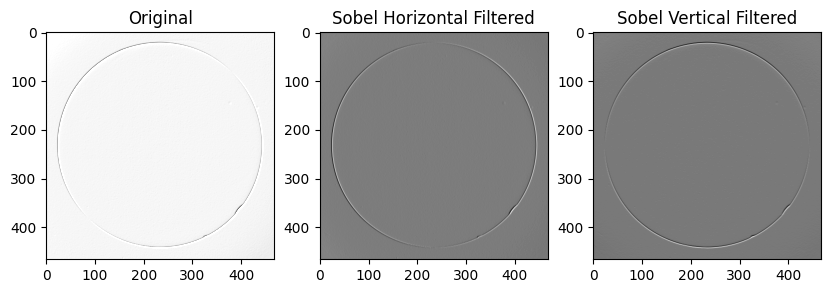

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


im= cv.imread(r"D:\Saves\Python\ImgProAssignment2\images\contact_lens.tif", cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None


sobel_h= np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
fx = cv.filter2D(im.astype('float'), -1, sobel_h)
fx = cv.normalize(fx.astype('float'), None,0, 255.0, cv.NORM_MINMAX)

sobel_v= np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
fy = cv.filter2D(im.astype('float'), -1, sobel_v)
fy = cv.normalize(fy.astype('float'), None,0, 255.0, cv.NORM_MINMAX)

magnitude= np.abs(fx) + np.abs(fy)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(magnitude, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(fx, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel Horizontal Filtered')
ax[2].imshow(fy, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Sobel Vertical Filtered')
plt.show()

Q2

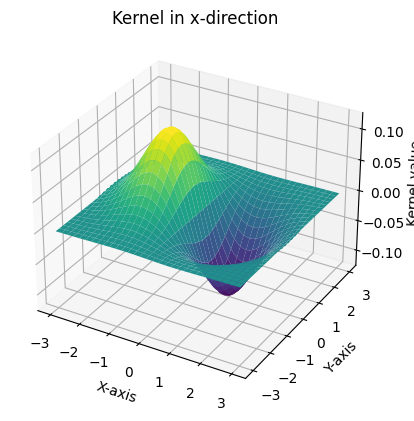

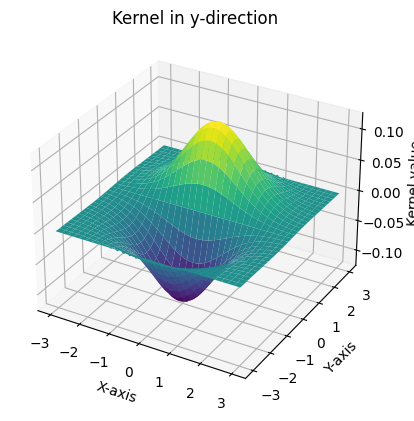

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# define the domain
x = np.arange(-3, 3.1, 0.1)
y = np.arange(-3, 3.1, 0.1)
X, Y = np.meshgrid(x, y)

# define sigma
sigma = 1

# calculate the kernels
G= np.exp(-(X**2+Y**2)/(2*sigma**2))

kernelx= np.array([[0,0,0],[-1,0.,1],[0,0,0]], dtype=np.float32)
Gx= cv.filter2D(G, -1, kernelx)

kernely= np.array([[0,1,0],[0,0,0],[0,-1,0]], dtype=np.float32)
Gy= cv.filter2D(G, -1, kernely)

# plot the kernels
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Gx, cmap='viridis')
ax.set_title('Kernel in x-direction')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Kernel value')
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Gy, cmap='viridis')
ax.set_title('Kernel in y-direction')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Kernel value')
plt.show()